In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [74]:
df_single = pd.read_csv('Infection_model_single_run_data.csv')

In [75]:
df_single

,Unnamed: 0,Infection_Num
0,0,133
1,1,169
2,2,190
3,3,202
4,4,212
...,...,...
146,146,192
147,147,194
148,148,203
149,149,207


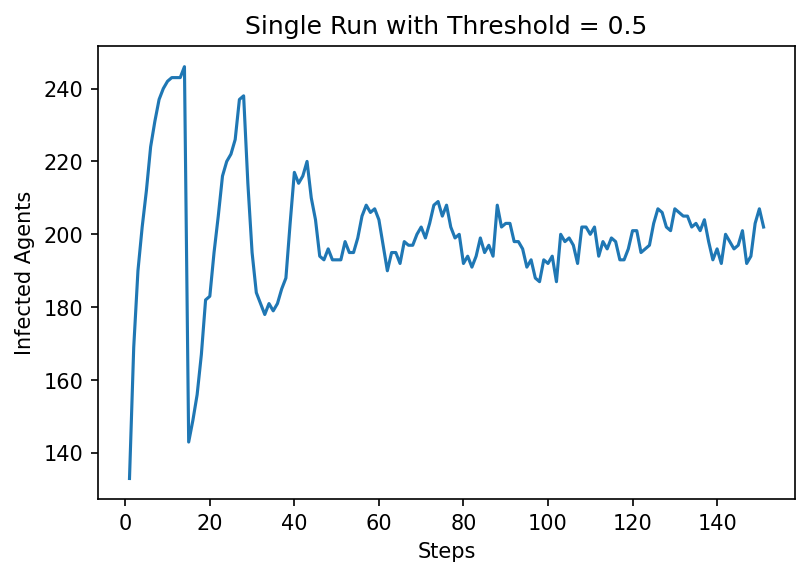

In [80]:
plt.figure(dpi = 150)
plt.plot(list(range(1,152)), 
         df_single.Infection_Num)
plt.title('Single Run with Threshold = 0.5')
plt.xlabel('Steps')
plt.ylabel('Infected Agents')
plt.savefig('plot.jpg')

In [35]:
df = pd.read_csv('Infection_model_step_batch_run_data.csv')

In [39]:
len(df)/151

40.0

In [4]:
df.head()

,Unnamed: 0,threshold,infected_agents
0,0,0.125,122
1,1,0.125,153
2,2,0.125,183
3,3,0.125,196
4,4,0.125,208


In [43]:
steps = list(range(1,152))*40

In [44]:
df['steps'] = steps

In [22]:
df.head()

,Unnamed: 0,threshold,infected_agents,steps
0,0,0.125,133,1
1,1,0.125,161,2
2,2,0.125,183,3
3,3,0.125,197,4
4,4,0.125,214,5


In [55]:
def plot_result():
    plt.figure(dpi = 150)
    plt.plot(list(range(1,152)), 
             df[(df.threshold == 0.125)].groupby('steps').mean().infected_agents, 
             label = '0.125')
    plt.plot(list(range(1,152)), 
             df[(df.threshold == 0.25)].groupby('steps').mean().infected_agents,
             label = '0.25')
    plt.plot(list(range(1,152)), 
             df[(df.threshold == 0.375)].groupby('steps').mean().infected_agents,
             label = '0.375')
    plt.plot(list(range(1,152)), 
             df[(df.threshold == 0.5)].groupby('steps').mean().infected_agents,
             label = '0.5')
    plt.plot(list(range(1,152)), 
             df[(df.threshold == 0.625)].groupby('steps').mean().infected_agents,
             label = '0.625')
    plt.plot(list(range(1,152)), 
             df[(df.threshold == 0.75)].groupby('steps').mean().infected_agents,
             label = '0.75')
    plt.plot(list(range(1,152)), 
             df[(df.threshold == 0.875)].groupby('steps').mean().infected_agents,
             label = '0.875')
    plt.xlabel('Steps')
    plt.ylabel('Infected Agents')
    plt.title('Self-quarantine Probability Threshold vs Infected Number')
    plt.legend(loc = 4)
    plt.savefig('plot1.jpg')

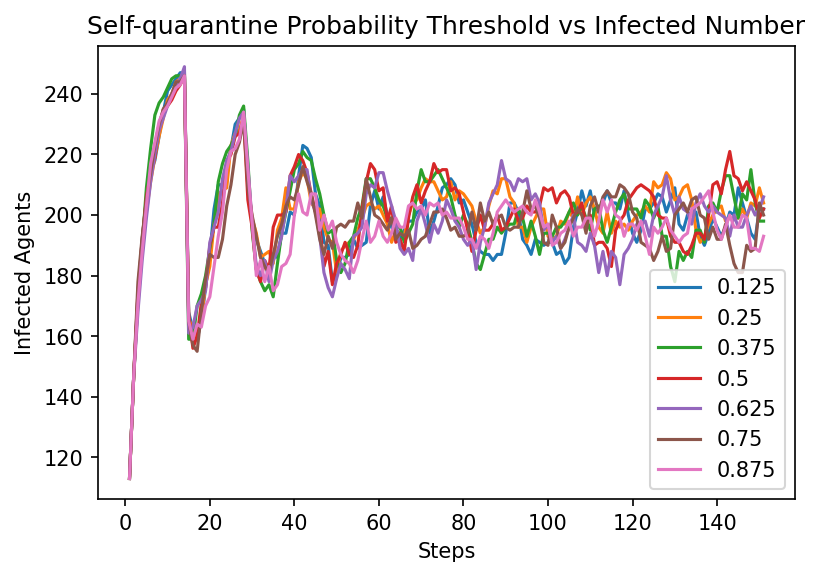

In [56]:
plot_result()

In [65]:
def plot_comparison():
    plt.figure(dpi = 150)
    plt.plot(list(range(1,152)), 
             df[(df.threshold == 1)].groupby('steps').mean().infected_agents, 
             label = 'Mask Only')
    plt.plot(list(range(1,152)), 
             df[(df.threshold == 0.125)].groupby('steps').mean().infected_agents,
             label = 'Mask + Self-Quarantine')

    plt.xlabel('Steps')
    plt.ylabel('Infected Agents')
    plt.title('Mask Only vs Mask + Self-Quarantine')
    plt.legend(loc = 4)
    plt.savefig('plot2.jpg')

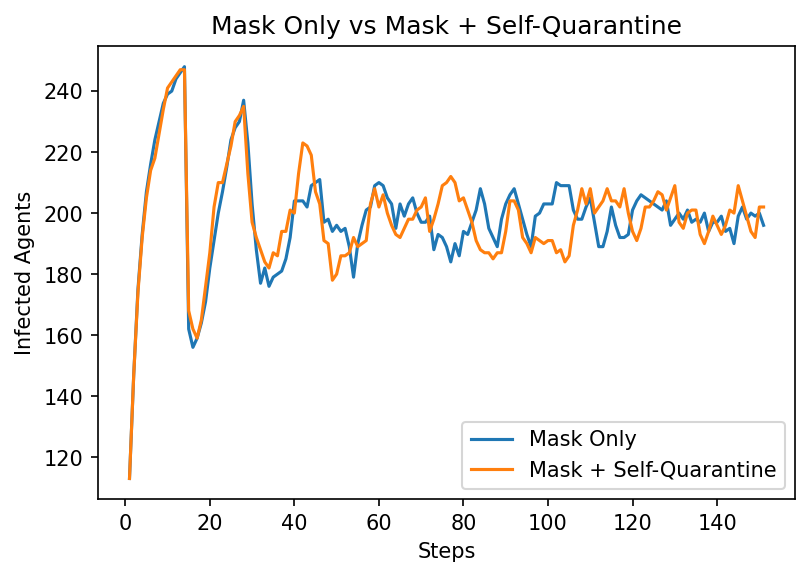

In [66]:
plot_comparison()

In [68]:
t_stat, p_value = stats.ttest_rel(df[(df.threshold == 1)].groupby('steps').mean().infected_agents, df[(df.threshold == 0.125)].groupby('steps').mean().infected_agents)

In [70]:
t_stat, p_value

(-0.1240392782357323, 0.9014502372629448)